# Machine Learning end-to-end project

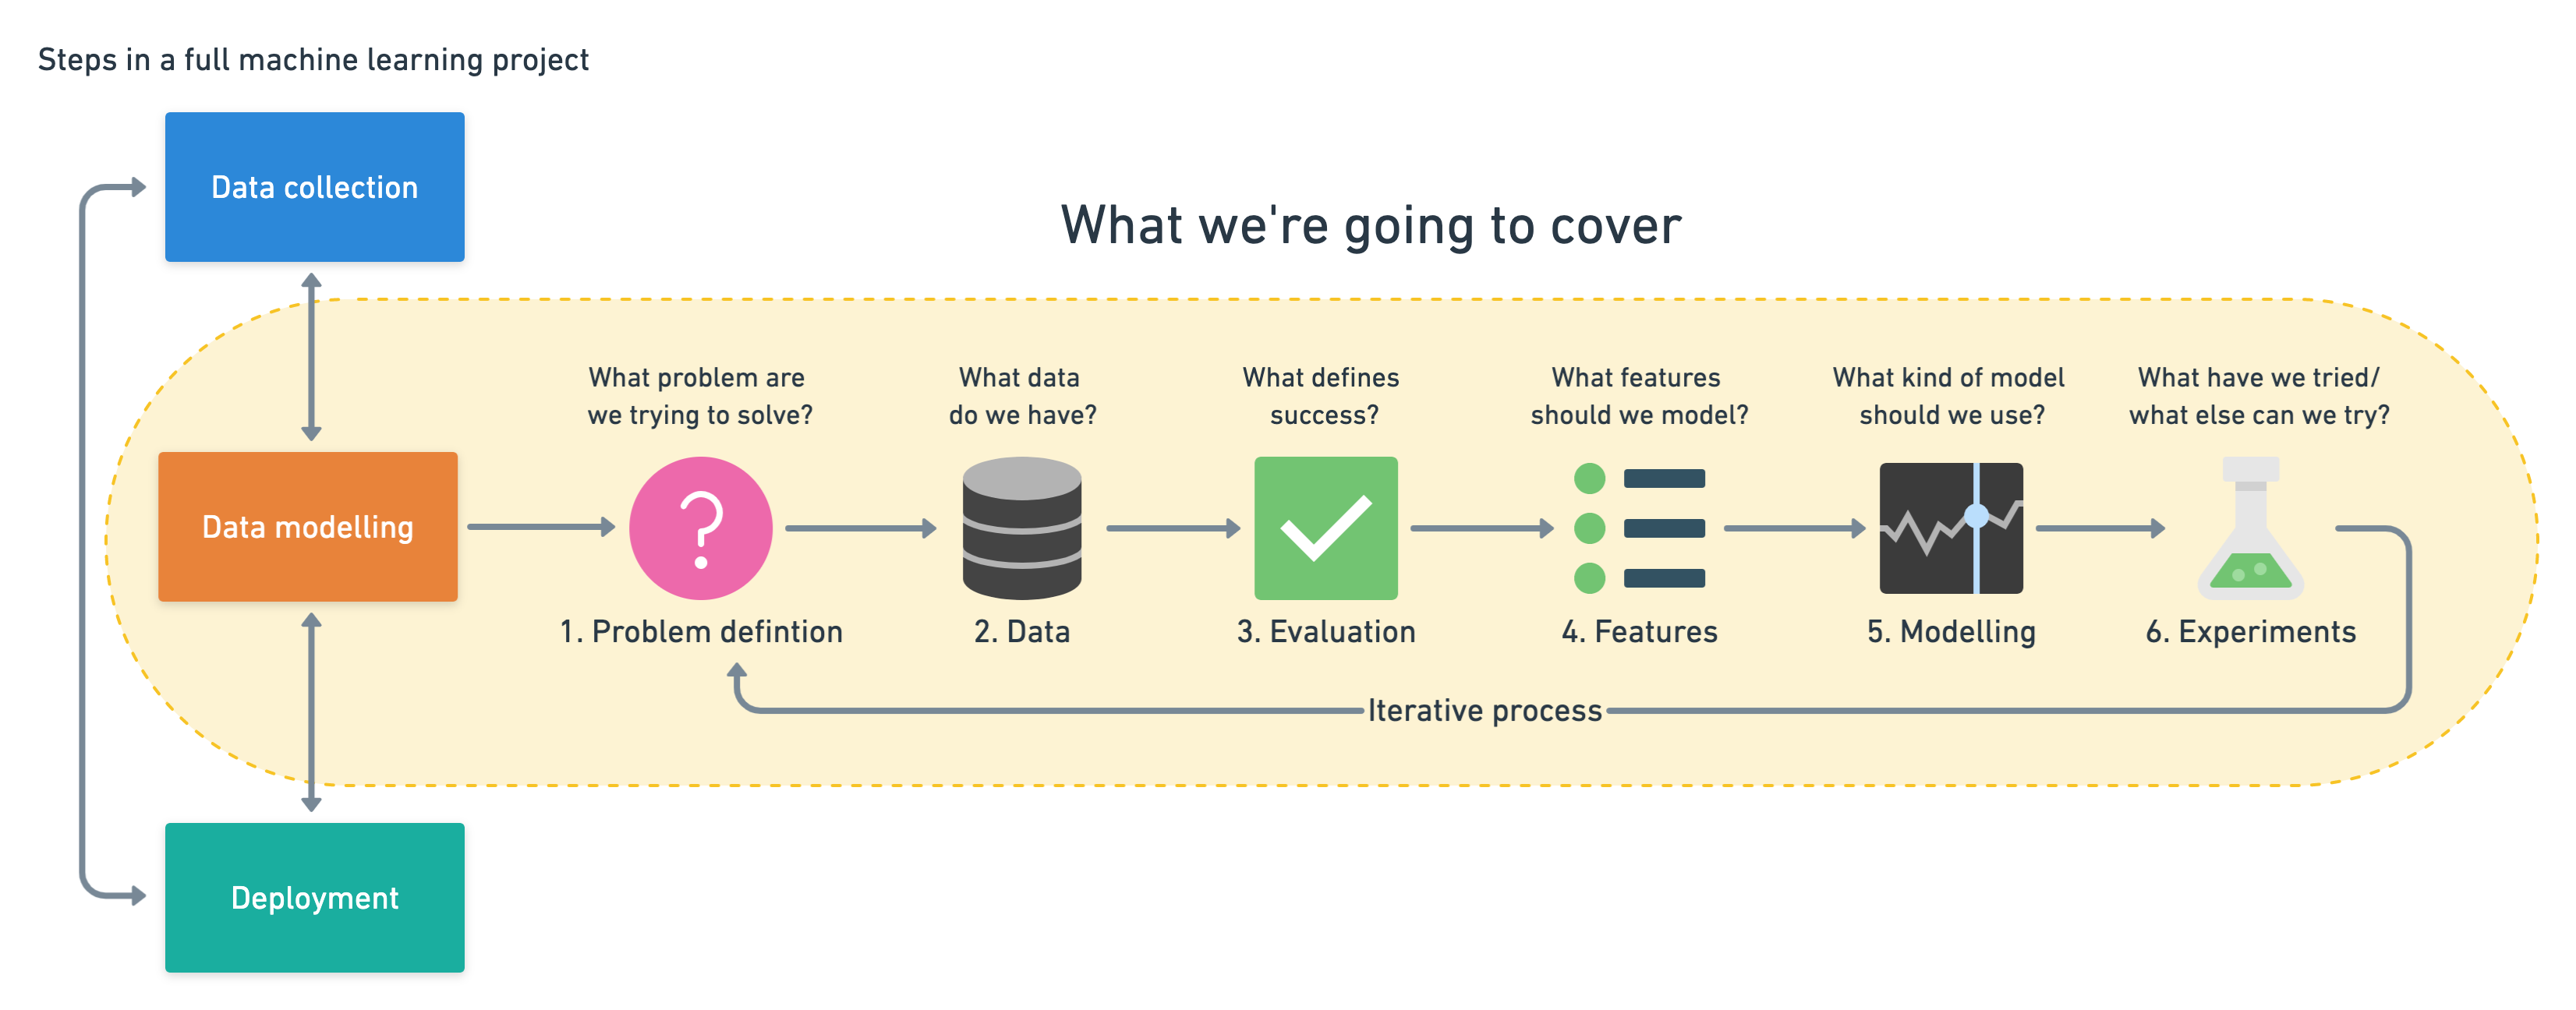

## Machine Learning Checklist

- Frame the Problem and look at the big picture.
- Get the Data
- Explore the Data
- Prepare the Data
- Shortlist Promising Models
- Fine-Tune the System
- Present Your Solution
- Launch!

### Select a Performance Measure
for regression problems you have a couple of performance measures you can pick including:

- MAE - Mean Absolute Error. this does not penalize large errors
- MSE - Mean Squared Error. this penalizes large errors
- RMSE - Root Mean Squared Error. this penalizes large errors
- R2 - Measures the strength of the relationship between the independent variables and the dependent variables by measuring the part of the variance of the dependent variable explained by the independent variable.
- RMSLE - Root Mean squared Log Error
- MAPE - Mean absolute Percentage Error

<hr style="border:1px solid black">

## Importing the necessary Libraries

In [2]:
# Importing the necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib as plot
import matplotlib.pyplot as plt
import sklearn

In [3]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")
filepath

'C:\\Users\\basel\\Desktop\\Notes\\housing.csv'

<hr style="border:1px solid black">

## Getting the Data

In [4]:
# Let's see the Dataset!
housing_data = pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<hr style="border:1px solid black">

## Data analysis

In [5]:
# Getting info from our dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

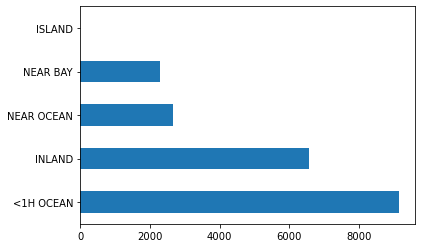

In [6]:
# Let's Take a quick look at the object
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

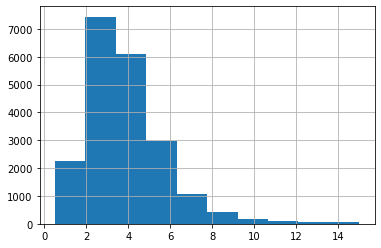

In [8]:
housing_data["median_income"].hist()

In [9]:
housing_data["income_cat"] = pd.cut(x= housing_data["median_income"], 
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])
housing_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

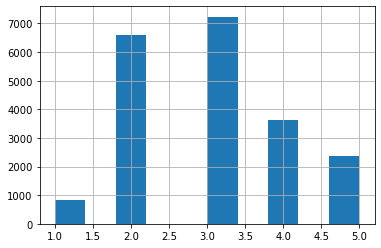

In [10]:
housing_data["income_cat"].hist()

In [11]:
# Creating X and Y datasets = Features and Labels
# We are trying to predict the median house value

y = housing_data["median_house_value"]
x = housing_data.drop("median_house_value", axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


<hr style="border:1px solid black">

## Spliting Datasets

#### The train_test_split splits the datasets horizontally into a training set and testing set, we are doing this to avoid Overfitting

-  Overfitting : means that your machine learning model doesn't look for general patterns and instead it looks at "how can i best optimize for this specific dataset?"

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4317,-118.34,34.08,50.0,3457.0,854.0,1584.0,841.0,3.1078,<1H OCEAN,3
12071,-117.56,33.86,25.0,6964.0,1066.0,3240.0,1036.0,5.2898,INLAND,4
19502,-121.02,37.66,36.0,3495.0,641.0,1688.0,684.0,3.1568,INLAND,3
10159,-117.95,33.90,15.0,3057.0,479.0,1679.0,498.0,6.8429,<1H OCEAN,5
1647,-121.82,37.81,12.0,4711.0,659.0,2089.0,621.0,8.3209,INLAND,5
...,...,...,...,...,...,...,...,...,...,...
4193,-118.24,34.12,41.0,1213.0,301.0,801.0,300.0,3.1806,<1H OCEAN,3
18781,-122.29,40.39,17.0,1682.0,332.0,887.0,316.0,1.8438,INLAND,2
16942,-122.31,37.56,52.0,2351.0,494.0,1126.0,482.0,3.9688,NEAR OCEAN,3
17483,-119.82,34.45,24.0,3592.0,533.0,1683.0,528.0,6.7247,NEAR OCEAN,5


<AxesSubplot:>

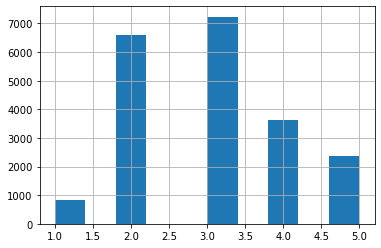

In [13]:
# let's go back to income_cat
housing_data["income_cat"].hist()

<AxesSubplot:>

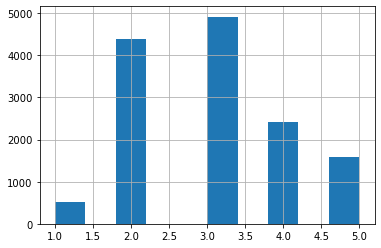

In [14]:
# now using X_train set to see the income_cat on it
X_train["income_cat"].hist()

#### We did this to see if the income category of that column is the distribution of values within my training set?

- turns out it's approximately equivalent to what i have in my testing set

#### Note: The Training set should always have the same distribution of values as the original set of data

### Stratified Split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    

#### This code is going to split the data using the income_cat to make sure that approximate percentages of each income category are evenly distributive 

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

### In this function we compare the overall percentage error

In [18]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size= 0.2, random_state= 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand, %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat, %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,"Rand, %error","Strat, %error"
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [19]:
strat_train_set.drop("income_cat", axis= "columns", inplace= True)
strat_test_set.drop("income_cat", axis= "columns", inplace= True)

<hr style="border:1px solid black">

## Visualizing the Data
data visualization is a very important part any modeling process.
Statistics alone can very rarely tell us what we need to know about a dataset, Visualizing data can even reveal obvious patterns that we didn't notice between all of the measures of central tendancy {mean, median, mode} are the exact same between them.

In [20]:
housing = strat_train_set.copy()

### Histograms
Histograms are a great way to start off the Visualization process, They help by giving a simple distribution of the data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

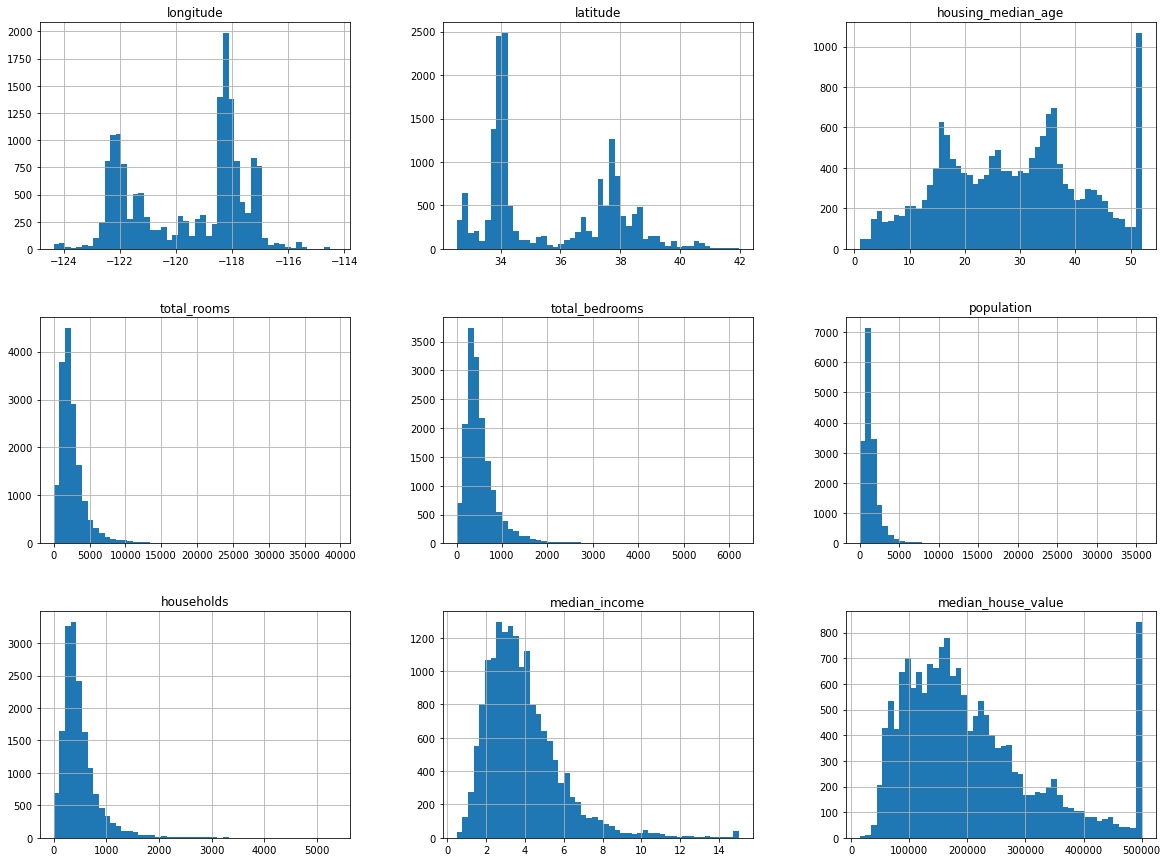

In [21]:
housing.hist(bins= 50, figsize=(20,15))

<AxesSubplot:>

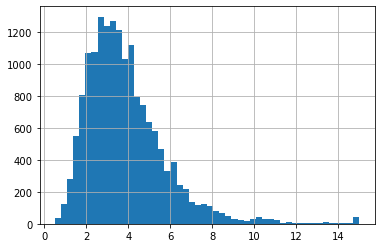

In [22]:
housing["median_income"].hist(bins= 50)

### Plotting Geographic Data
If you have longtitude and latitude you should plto them on a map to see what patterns they would reveal.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

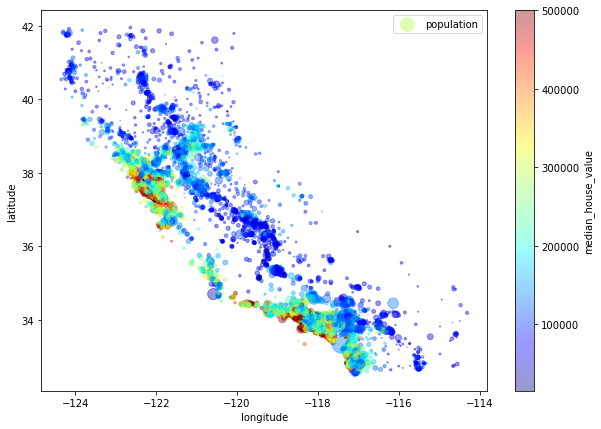

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha= 0.4,
            s= housing["population"] / 100, label= "population", figsize= (10,7),
            c= "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            sharex = False)

<hr style="border:1px solid black">

## Correlation Matrices
A correlation matrix is a grid that shows the correlation of every numerical variable against every other numerical variable. it can be a good way to see which variables are of a particular interest for your target variable.

In [24]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

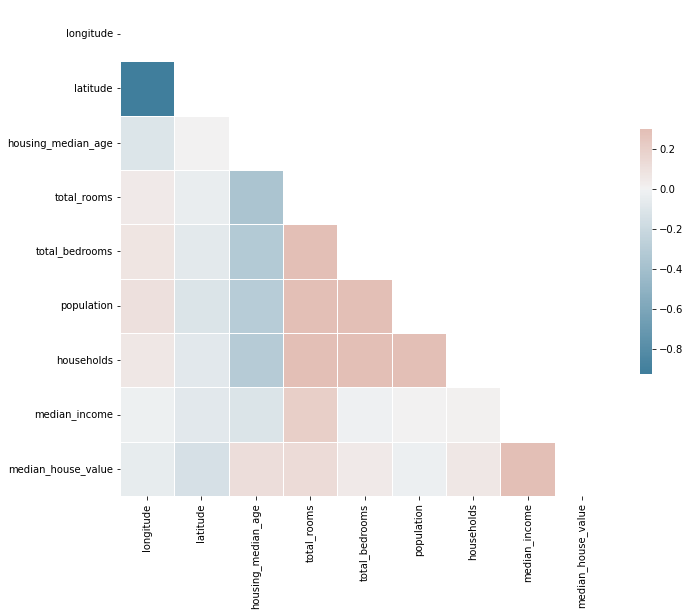

In [25]:
corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize= (11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {"shrink":.5})

<hr style="border:1px solid black">

## Preparing Data for Machine Learning

Data Preparation is oftentimes the most time-consuming step of the modeling process. it is also one of the most important with model accuracy often contingent on the quality of data inserted, to this end we will be applying the following transformations on this data, not in this particular order:

- **Feature Engineering:** Creating new features (Columns) out of our raw data using domain in knowledge.
- **Imputation:** Inserting values where they might be missing to have a complete dataset.
- **Encoding Categorical Variables:** Transforming categorical vairables into some numerical variables.
- **Scaling:** Applying a scalar that transforms all of our data on the same numerical scale.

In [26]:
housing = strat_train_set.drop("median_house_value", axis= 1)

housing_labels =strat_train_set["median_house_value"].copy()

### 1- Dealing with missing values (Imputation)
Many Machine learning algorithms don't work very well with missing values. Because of this we need to learn to deal with them, First let's see if we can find the values that we are interested in.

In [27]:
sample_incomplete_rows = housing[housing.isnull().any(axis= 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


#### To deal with missing we have 3 options.
- Option 1: Drop the rows with missing values in any columns
- Option 2: Drop the Columns with missing values
- Option 3: Impute (fill in) the values with some replacement value, this can be a completely different value like -999 So the algorithm will learn that the value is missing, Or the mean or the median or mode of the column

In [28]:
# Option 1
sample_incomplete_rows.dropna(subset= ["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [29]:
# Option 2
sample_incomplete_rows.drop("total_bedrooms",axis= 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [30]:
# Option 3
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")

In [32]:
housing_num = housing.select_dtypes(include= [np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [33]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


<hr style="border:1px solid black">

### 2- Encode Categorical Variables

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse= False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot# Create a "dense array" meaning that all instances have a value not just the ones that are encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<hr style="border:1px solid black">

### 3- Feature Engineering
Feature Engineering is the art/Science of using domain knowledge to create new features (Columns) of data using raw data. This can be a key to improving the performance of your Machine learning models.

In [37]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    return data

In [38]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1.067416,3.808989,5.505618


<hr style="border:1px solid black">

### 4- Scaling Our Data
Many machine learning algorithms don't work well with unscaled data. for example, the magnitude of values in the "total_rooms" feature is going to be substantially higher than that in the "median_income" feature (because the median_income is scaled down by 1000). Because of this we usually will need to scale our values.

There are multiple ways to accomplish this. and we will use the **StandardScalar** which will scale our values to their z-score within their column like so:

**z = (x - u) / s**

where x is the value we're scaling.
u is the mean of the column
s is the standard deviation

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.12461343,
        -0.08649871, -0.31205452],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.28097679,
        -0.03353391,  0.21768338],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.15586354,
        -0.09240499, -0.46531516],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.08048715,
        -0.03055414,  0.3469342 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.06175575,
         0.06150916,  0.02499488],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0619974 ,
        -0.09586294, -0.22852947]])

<hr style="border:1px solid black">

## Pipelines
Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another, There is a little bit of complexity associated with them, So we will just create our own version of pipeline using a normal Python function.

In [40]:
housing = strat_train_set.drop("median_house_value", axis = 1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformation(data):
    
    ### Seperate labels if they exist ###
    
    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis = 1)
    else:
        labels = None
        
    ### Feature Engineering ###
    
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)
    # Creating a list of our features for future use
    
    ### Imputing Data ###
    
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy = "median")
    
    housing_num = feature_engineered_data.select_dtypes(include = [np.number])
    imputed = imputer.fit_transform(housing_num)
    
    ### Encoding Categorical Data ###
    
    housing_cat = feature_engineered_data.select_dtypes(exclude = [np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse= False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")
    # we're encoding this variable, so we don't need it in our list anymore
    
    ### Scaling Numerical Data ###
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    ### Concatening all Data ###
    
    output = np.hstack([housing_scaled, housing_cat_1hot])
    
    return output, labels, features

<hr style="border:1px solid black">

## Select and train a model

### Transform our data using the "Pipeline" we created

we now need to create a clean training dataset to "train" our machine learning regressors, and a "test" set to test the accuracy of said regressors. let's input our stratified samples into our "pipeline".

In [41]:
train_data, train_labels, features = data_transformation(strat_train_set)
train_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
test_data, test_labels, features = data_transformation(strat_test_set)
test_data

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  0.        ,
         0.        ,  0.        ]])

<hr style="border:1px solid black">

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

lin_re = LinearRegression()

lin_re.fit(train_data, train_labels)

LinearRegression()

In [44]:
# Compare against some Test Data

original_values = test_labels[:5]

predicted_values = lin_re.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data = {"Original values":original_values,
                                           "Predicted values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original values"] - comparison_dataframe["Predicted values"]

comparison_dataframe

,Original values,Predicted values,Differences
5241,500001.0,421413.363329,78587.636671
10970,240300.0,260227.976280,-19927.976280
20351,218200.0,226814.811944,-8614.811944
6568,182100.0,202785.858376,-20685.858376
13285,121300.0,165947.558618,-44647.558618


### Mean Square Error

In [45]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_mse = np.sqrt(lin_mse)
lin_mse

42587.944510693924

### Now with Mean Absolute Error

In [46]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

34492.76837769452

<hr style="border:1px solid black">

## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [48]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<hr style="border:1px solid black">

## Cross validation
it seems our performance above was top notch. Instead of jst splitting our data into a train and test set and training once, We can do something called **K-Fold Cross Validation** which will split our training dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. 

it does this for all of the folds which can let us mpre rigorously evaluate the model.

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring= "neg_mean_squared_error", cv= 10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [71651.73681115 68908.88378904 69837.95849446 74273.12571063
 70569.16041628 74723.14094394 70439.52867477 69259.50811177
 78240.7656732  69561.76956763]
Mean:  71746.55781928787
Standard Deviation:  2884.0209802819504


<hr style="border:1px solid black">

## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [52]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18678.183211366006

In [53]:
# This can take a while depending on how fast your computer is

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring= "neg_mean_squared_error", cv= 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores

<function __main__.display_scores(scores)>

In [54]:
scores = cross_val_score(lin_re, train_data, train_labels,scoring= "neg_mean_squared_error", cv= 10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69181.077598
std       2873.435264
min      65040.039275
25%      67422.917056
50%      68286.575870
75%      70953.770562
max      74628.435067
dtype: float64

<hr style="border:1px solid black">

## Fine-Tuning the Model
After you pick a model or set of models that are promising, you will need to fine-tune the hyperparameters (parameters of the model that aren't affected by training) in order to find the best ones to use for your model.

You can use something called **Grid Search** in order to accomplish this.

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2*6) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state= 42)
# train across 5 folds, that's a total of (12+6)*5 = 90 rounds of training

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring= 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64796.29671399816 {'max_features': 2, 'n_estimators': 3}
55775.16268850132 {'max_features': 2, 'n_estimators': 10}
53249.85197335964 {'max_features': 2, 'n_estimators': 30}
61138.14355385365 {'max_features': 4, 'n_estimators': 3}
52863.07424277029 {'max_features': 4, 'n_estimators': 10}
50407.76890205031 {'max_features': 4, 'n_estimators': 30}
58164.54455183473 {'max_features': 6, 'n_estimators': 3}
52152.13119714364 {'max_features': 6, 'n_estimators': 10}
49930.745353171194 {'max_features': 6, 'n_estimators': 30}
58193.17858193583 {'max_features': 8, 'n_estimators': 3}
52149.918210044154 {'max_features': 8, 'n_estimators': 10}
49547.47082113679 {'max_features': 8, 'n_estimators': 30}
63033.39486799303 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54575.277358618645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58515.25644925327 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52081.57821584743 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [59]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051037,5.918677e-03,0.003124,0.006249,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.033145e+09,-4.216802e+09,...,-4.198560e+09,9.656402e+07,18,-1.156359e+09,-1.086126e+09,-1.179434e+09,-1.232901e+09,-1.122620e+09,-1.155488e+09,4.991685e+07
1,0.160830,8.991376e-03,0.014093,0.003057,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.850059e+09,-3.263461e+09,...,-3.110869e+09,1.534865e+08,11,-5.897121e+08,-5.684097e+08,-5.849390e+08,-5.899852e+08,-5.746099e+08,-5.815312e+08,8.603367e+06
2,0.476138,1.674866e-02,0.023331,0.006987,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.600753e+09,-2.982751e+09,...,-2.835547e+09,1.754162e+08,9,-4.469698e+08,-4.340389e+08,-4.381881e+08,-4.418626e+08,-4.265185e+08,-4.375156e+08,6.953489e+06
3,0.080602,6.100849e-03,0.001197,0.001466,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.415646e+09,-3.800466e+09,...,-3.737873e+09,1.708007e+08,16,-9.841236e+08,-9.532705e+08,-1.042962e+09,-1.060888e+09,-9.435309e+08,-9.969549e+08,4.718291e+07
4,0.243691,7.655220e-03,0.006252,0.007658,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.659842e+09,-2.874472e+09,...,-2.794505e+09,8.887037e+07,8,-5.230004e+08,-5.096829e+08,-5.065158e+08,-5.372295e+08,-5.064914e+08,-5.165840e+08,1.198549e+07
5,0.718577,5.011103e-06,0.021875,0.007649,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.381173e+09,-2.618105e+09,...,-2.540943e+09,1.257149e+08,3,-3.887976e+08,-3.832867e+08,-3.850775e+08,-4.035270e+08,-3.821878e+08,-3.885753e+08,7.805208e+06
6,0.093727,6.106495e-07,0.000000,0.000000,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.062387e+09,-3.441023e+09,...,-3.383114e+09,1.705490e+08,12,-8.649995e+08,-8.643093e+08,-9.099060e+08,-9.282465e+08,-9.060524e+08,-8.947027e+08,2.565613e+07
7,0.331174,6.246307e-03,0.009373,0.007653,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.547701e+09,-2.759930e+09,...,-2.719845e+09,1.324912e+08,7,-4.945902e+08,-4.916454e+08,-4.935797e+08,-5.032370e+08,-5.059995e+08,-4.978103e+08,5.705876e+06
8,1.012260,3.029087e-02,0.028119,0.006249,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.334794e+09,-2.551722e+09,...,-2.493079e+09,1.502788e+08,2,-3.789610e+08,-3.742746e+08,-3.790410e+08,-3.801853e+08,-3.789293e+08,-3.782783e+08,2.056092e+06
9,0.134343,7.652943e-03,0.003124,0.006249,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.349788e+09,-3.698870e+09,...,-3.386446e+09,1.888014e+08,13,-9.185787e+08,-8.937910e+08,-8.289324e+08,-9.110356e+08,-9.119743e+08,-8.928624e+08,3.299928e+07


<hr style="border:1px solid black">

## Randomized Search
Randomized Search allows you to more easily find the hyperparameters that we're interested in because instead of searching throught all possible combinations, it randomly picks a couple and tries those out.

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
                                                
param_distribs={
        'n_estimators':randint(low=1,high=200),
        'max_features':randint(low=1,high=8),
    }
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg,param_distributions = param_distribs,
                                n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(train_data,train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002020C74CE80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020268A257F0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [61]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48872.96730239911 {'max_features': 7, 'n_estimators': 180}
51407.61346702038 {'max_features': 5, 'n_estimators': 15}
50440.74137729941 {'max_features': 3, 'n_estimators': 72}
50715.017643468156 {'max_features': 5, 'n_estimators': 21}
48979.26226521618 {'max_features': 7, 'n_estimators': 122}
50429.11256883642 {'max_features': 3, 'n_estimators': 75}
50278.24289394691 {'max_features': 3, 'n_estimators': 88}
49215.51860219781 {'max_features': 5, 'n_estimators': 100}
50163.34567766393 {'max_features': 3, 'n_estimators': 150}
65146.55285210115 {'max_features': 5, 'n_estimators': 2}


In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.27645191e-02, 6.42396403e-02, 4.31625073e-02, 1.59415065e-02,
       1.43511492e-02, 1.53067941e-02, 1.45315454e-02, 3.77190926e-01,
       2.31534220e-02, 1.06333683e-01, 7.28545386e-02, 8.86746054e-03,
       1.67043593e-01, 1.01091754e-04, 1.54638032e-03, 2.61124239e-03])

<hr style="border:1px solid black">

## Feature Importance List
Judging the importance of various features is very important as this allows us to explain to our stakeholders which feature is most important and which it is becoming more important as more advanced models behave like blackboxes. 

In [63]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.07276451905687747),
 ('latitude', 0.06423964030907003),
 ('housing_median_age', 0.04316250728302085),
 ('total_rooms', 0.0159415064754067),
 ('total_bedrooms', 0.014351149206325242),
 ('population', 0.015306794129914468),
 ('households', 0.014531545444431405),
 ('median_income', 0.37719092616977545),
 ('bedrooms_per_household', 0.023153421979392307),
 ('population_per_household', 0.10633368337710118),
 ('rooms_per_household', 0.07285453862321799),
 ('<1H OCEAN', 0.008867460535337829),
 ('INLAND', 0.16704359295081123),
 ('ISLAND', 0.00010109175397702533),
 ('NEAR BAY', 0.0015463803195537658),
 ('NEAR OCEAN', 0.002611242385787115)]

<BarContainer object of 16 artists>

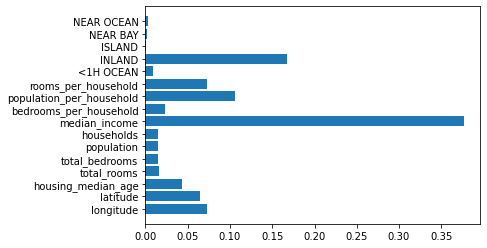

In [64]:
plt.barh(y = features, width = feature_importances.tolist())

<hr style="border:1px solid black">

## The Final model

In [65]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)

final_rmse = np.sqrt(final_mse)

final_rmse

66242.47977049224